<a href="https://colab.research.google.com/github/PedroJuiz/UnsupervisedLearning/blob/main/Expansion_plan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="newlogomioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura: Machine learning 2: Unsupervised learning</center>

# Challenge S5: Clusterización II

<font size="5"><center><span style="color:blue">***Nombre y Apellidos: Pedro Juiz Díaz***</span></center></font>

## Plan de expansión: apertura de nuevas tiendas

Una cadena de supermercados desea identificar áreas en las que abrir nuevos centros.

Utilizando información censal (tabla CENSUS2000) el objetivo es encontrar áreas cuyos perfiles de clientes se adapten a diferentes tipologías de centros: boutiques, supermercados de presupuesto medio, grandes superficies, etc.

Se supone que el país tiene una densidad muy baja de establecimientos comerciales y se puede seguir abriendo tiendas en las diferentes regiones.

<img src="tienda.jpg">

## Configuración del entorno

Es recomendable declarar en un bloque al inicio todos los paquetes que vas a utilizar en este notebook:

In [ ]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

### Información del dataset Census2000
Como hemos mencionado, vamos a hacer uso de un dataset con información censal (tabla CENSUS2000).

Las variables de las que dispone son:  

* Numrow: Numero de fila
* ID: Identificador del registro
* LocX y LocY para geolocalizar las zonas
* RegDens: Densidad de población de la región
* RegPop: Número de habitantes de la región
* MedHHInc: Nivel de ingresos medio de la unidad familiar
* MeanHHSz: Tamaño medio de la unidad familiar (HH = Household)

Los datos se encuentran en un fichero `csv` llamado `census2000.csv`.

Carga los datos en un dataframe para hacer los ejercicios de este bloque.

In [ ]:
dfc=pd.read_csv("census2000.csv")

Una vez cargados los datos debemos inspeccionarlos antes de empezar nuestro análisis.

In [ ]:
dfc.head()

,Numrow,ID,LocX,LocY,RegDens,RegPop,MedHHInc,MeanHHSz
0,0,00601,-66.749472,18.180103,70.0,19143.0,9888.0,3.24
1,1,00602,-67.180247,18.363285,83.0,42042.0,11384.0,3.10
2,2,00603,-67.134224,18.448619,86.0,55592.0,10748.0,2.84
3,3,00604,-67.136995,18.498987,83.0,3844.0,31199.0,3.00
4,4,00606,-66.958807,18.182151,65.0,6449.0,9243.0,3.20


¿Cuantos registros y columnas tiene el dataset?

¿De que tipo son los datos cargados?

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33178 entries, 0 to 33177
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Numrow    33178 non-null  int64  
 1   ID        33178 non-null  object 
 2   LocX      33178 non-null  float64
 3   LocY      33178 non-null  float64
 4   RegDens   32165 non-null  float64
 5   RegPop    33178 non-null  float64
 6   MedHHInc  33178 non-null  float64
 7   MeanHHSz  33178 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ MB


## Filtrado de datos
Una particularidad de este dataset es que contiene información sobre hogares que no tiene miembros en la unidad familiar. Cuantos registros se tienen con unidades familiares iguales o superiores a 1?:

In [ ]:
mask = dfc[dfc.MeanHHSz >= 1]
len(mask)

32079

En este caso vamos a trabajar sólo con aquellos registros con unidades familiares mayores o iguales que 2, para ello tienes que filtrar los datos y quedarte solo con dichos datos.

In [ ]:
df = dfc[dfc.MeanHHSz >= 2]


De esta manera hemos filtrado los datos y podemos ver el resultado:

In [ ]:
df.head()

,Numrow,ID,LocX,LocY,RegDens,RegPop,MedHHInc,MeanHHSz
0,0,00601,-66.749472,18.180103,70.0,19143.0,9888.0,3.24
1,1,00602,-67.180247,18.363285,83.0,42042.0,11384.0,3.10
2,2,00603,-67.134224,18.448619,86.0,55592.0,10748.0,2.84
3,3,00604,-67.136995,18.498987,83.0,3844.0,31199.0,3.00
4,4,00606,-66.958807,18.182151,65.0,6449.0,9243.0,3.20


## Visualización de los datos
Para hacernos una idea de los datos podemos generar algunos gráficos con las principales características de los datos. Podemos utilizar gráficos de barras, sectores, histograma de frecuencias.

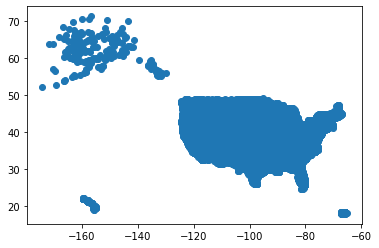

In [ ]:
plt.scatter(df.LocX, df.LocY)
plt.show()

* ¿Qué nos están diciendo estos gráficos sobre los datos?

El grafico previo nos da la información de que los datos son hogares que se encuentran en EEUU.

* ¿Aprecias normalidad de los datos? Genera un histograma con cada variable que consideres y revisa si ¿Tiene forma de campana?


<function matplotlib.pyplot.show(close=None, block=None)>

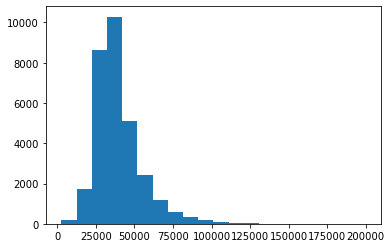

In [ ]:
plt.hist(df.MedHHInc, bins=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

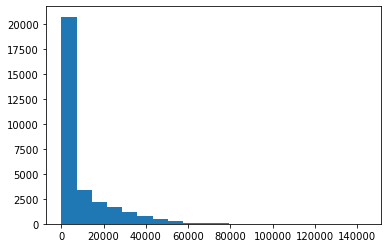

In [ ]:
plt.hist(df.RegPop, bins=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

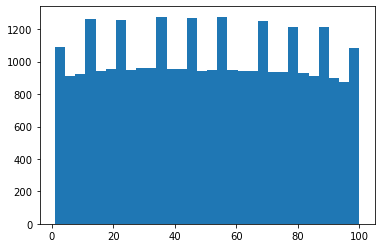

In [ ]:
plt.hist(df.RegDens, bins=30)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

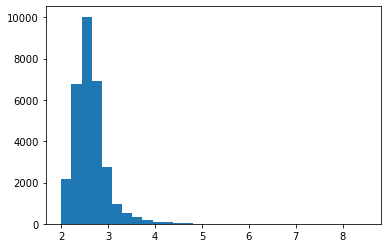

In [ ]:
plt.hist(df.MeanHHSz, bins=30)
plt.show

También puedes revisar la relación que existe entre las variables, la forma mas sencilla es mediante un gráfico de dispersión o calculando el coeficiente de correlación para revisar las relaciones lineales.

#### Algunos apuntes sobre el coeficiente de correlación
El [coeficiente de correlación ](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson) es una medida del grado de *dependencia lineal* entre dos variables. El [coeficiente de correlación](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson) oscila entre -1 y 1. Un valor de 1 significa que una [ecuación lineal](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_primer_grado) describe la relación entre las dos variables a la perfección, con todos los puntos de datos cayendo sobre una línea recta de pendiente positiva. Un valor de -1 implica que todos los puntos de datos se encuentran en una línea con pendiente negativa. Un valor de 0 implica que no existe una correlación lineal entre las variables. Lo podemos calcular con el método `corr`.

In [ ]:
# coeficiente de correlación
corr_matrix = df.corr()
corr_matrix

,Numrow,LocX,LocY,RegDens,RegPop,MedHHInc,MeanHHSz
Numrow,1.000000,-0.888357,-0.043701,-0.279940,0.002020,-0.111858,0.143020
LocX,-0.888357,1.000000,-0.116894,0.254617,-0.015625,0.067608,-0.184683
LocY,-0.043701,-0.116894,1.000000,-0.161722,-0.180388,0.121010,-0.074380
RegDens,-0.279940,0.254617,-0.161722,1.000000,0.623130,0.367567,0.087272
RegPop,0.002020,-0.015625,-0.180388,0.623130,1.000000,0.202925,0.108856
MedHHInc,-0.111858,0.067608,0.121010,0.367567,0.202925,1.000000,0.154244
MeanHHSz,0.143020,-0.184683,-0.074380,0.087272,0.108856,0.154244,1.000000


<AxesSubplot:>

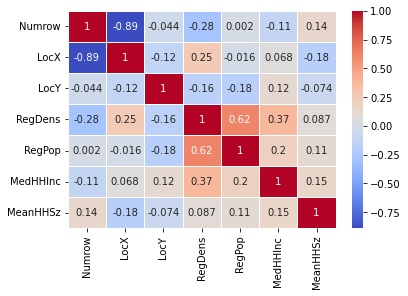

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)

#### Recuerda también que correlación no implica causalidad.
Todo esto de la mala interpretación de la correlación también se encuentra, y en demasiadas ocasiones, en estudios científicos supuestamente serios. No son pocos los estudios que al encontrar una cierta relación entre dos variables presentes en los sujetos estudiados se tiran a la piscina afirmando que por tanto una de ellas es la causa de la otra, cuando en realidad en dichos estudios no hay ninguna evidencia de que esto sea verdad (simplemente hay correlación).

Echa un vistazo a este link y sorprendete con las "Spurious correlations"  http://tylervigen.com/spurious-correlations

<img src="correlacion.png" style="height: 150px">

## Transformación de variables

Una herramienta muy interesante a utilizar en aquellas variables que no cumplan con los criterios de normalidad es aplicar alguna transformación sobre las mismas, en particular el logaritmo funciona muy bien, y después de aplicarla confirma si los datos transformados se comportan como una normal.

Las ventajas de aplicar una transformación cuando la distribución de la variable no es normal son las siguientes:

* Que el efecto de posibles outliers sea menor.
* En algunos casos podría inducir normalidad, condición no necesaria, pero deseable.
* Que los rangos de las variables sean más comparables

<img src="logaritmo.png" style="height: 200px">

## Tratamiento de los datos, preprocessing

Respecto al tratamiento de datos, se llevarán a cabo las siguientes tareas:

* Imputación de missings.- la única variable que contiene valores missings es RegDens. Se predecirán sus valores a partir del resto de explicativas.

* Tratamiento de outliers.- se podrían filtras aquellas observaciones atípicas respecto de cada una de las variables. Hay que tener en cuenta que esto implicaría la pérdida de algunas regiones.

* Alternativamente (para no perder registros) o de forma adicional, se puede aplicar una transformación a las variables con las ventajas ya mencionadas

## Imputación de valores ausentes
En los pasos anteriores hemos identificado los outliers y les hemos asignado a un valor nulo.

Ahora en este paso lo que vamos a hacer es darles un valor a los outliers para tener un dataset sin valores nulos y completar también si hay datos missing. Utiliza la técnica que consideres mas adecuada.

Recuerda que una opción es predecir los valores missing a partir de otras variables explicativas a través de una regresión.

Para mostrarte como realizar una regresión simple te incluyo un ejemplo a continuación.
En primer lugar generamos unos datos "casi aleatorios" que nos sirvan de ejemplo. Se trata de ajustar una línea que siga el modelo siguiente:
$$
y = ax + b
$$
donde $a$ es conocida como *slope* o *pendiente*, y $b$ es conocida como *intercept* o *constante*.

Consideramos los siguientes datos, que mostramos con gráfico de dispersión y que consiste en un modelo con pendiente 2 y constante -5:

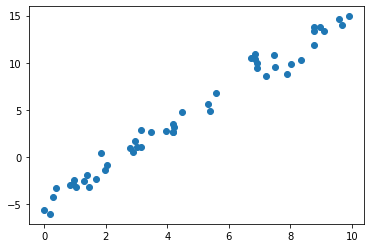

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Podemos utilizar el estimador Scikit-Learn's LinearRegression para ajustar los datos y construir la recta que mejor se ajusta:

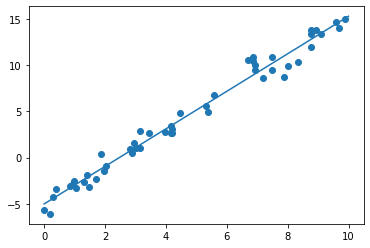

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Y ya lo tenemos, la pendiente y la constante del modelo están en los parámetros fit, que como sabemos aparecen en Scikit-Learn marcados con un guión bajo.
Los parámetros relevantes son ``coef_`` y ``intercept_``. Y podemos utilizar cualquier nuevo dato de x para estimar y.

In [ ]:
df['RegPop_log'] = np.log(df['RegPop'])
df['MedHHInc_log'] = np.log(df['MedHHInc'])

<function matplotlib.pyplot.show(close=None, block=None)>

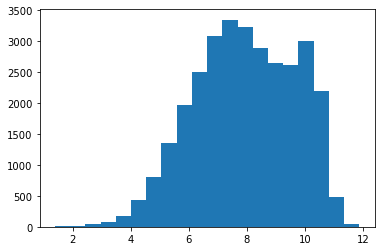

In [ ]:
plt.hist(df.RegPop_log, bins=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

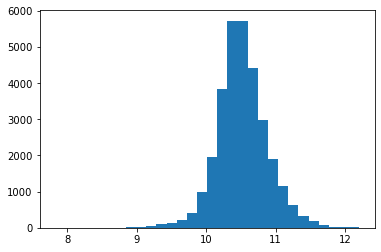

In [ ]:
plt.hist(df.MedHHInc_log, bins=30)
plt.show

In [ ]:
df = df.drop(columns = ['Numrow', 'MedHHInc', 'RegPop'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30899 entries, 0 to 33177
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            30899 non-null  object 
 1   LocX          30899 non-null  float64
 2   LocY          30899 non-null  float64
 3   RegDens       30899 non-null  float64
 4   MeanHHSz      30899 non-null  float64
 5   RegPop_log    30899 non-null  float64
 6   MedHHInc_log  30899 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.9+ MB


* ¿Consideras que dispones ahora de un dataset mas adecuado para hacer un clustering? ¿Por qué?

Aparentemente si, no hay valores nulos en el dataset y he normalizado 2 variables, utilizando la transformación logarítmica, que en su distribución tenían la cola de la derecha un poco alargada y he conseguido darles una distribución más normal.

# Clustering jerárquico aglomerativo y kmeans

En esta parte queremos aplicar el método K-means ( y en particular kmeans ++) al dataset anterior con el objetivo de determinar los clusters mas adecuados para abrir tiendas e incluso la tipología de tiendas que consideremos mas apropiada para los diferentes clusters.

* Aunque existen otras técnicas, se recomienda aplicar un método de clusterización jerárquico aglomerativo en una primera etapa y a través del dendrograma seleccionar el número de clusters adecuado

* Posteriormente aplicamos kmeans sobre los clusters estimados por el metodo jerárquico.

Para que sea mas productivo, la recomendación es realizarlo de la siguiente forma:

* Primero seleccionar una submuestra de 100-200 registros para visualizar adecuadamente el dendrograma y de ahí extraer el número de clusters.
* Aplicar kmeans al número de clusters elegido previamente.

Si el resultado no fuese adecuado ejecutar kmeans variando el número de clusters de acuerdo a la información proporcionada por el dendrograma.

In [ ]:
submuestra = df.sample(200)

In [ ]:
submuestra.head()

,ID,LocX,LocY,RegDens,MeanHHSz,RegPop_log,MedHHInc_log
21568,62565,-88.801536,39.409126,48.0,2.35,8.946896,10.518322
5696,18848,-76.452988,41.762543,51.0,2.46,9.140990,10.488660
26597,76513,-97.486425,31.073329,69.0,2.67,10.235414,10.582333
4619,15847,-79.030800,41.084340,64.0,2.67,5.598422,10.175421
4569,15736,-79.343324,40.694906,83.0,2.42,5.877736,10.491274


In [ ]:
points = submuestra[['LocX', 'LocY', 'RegDens', 'MeanHHSz','RegPop_log', 'MedHHInc_log']].values

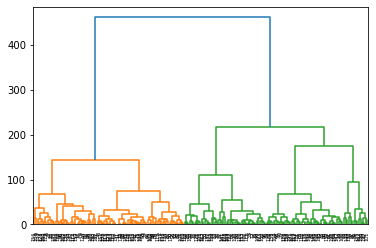

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(points)

Viendo el dendograma, considero que el numero de clusters óptimo sería 5.

In [ ]:
n_clusters = 5
df_kmeans = df[['LocX', 'LocY', 'RegDens', 'MeanHHSz','RegPop_log', 'MedHHInc_log']]

kmeans_model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df_kmeans['cluster'] = kmeans_model.fit_predict(df_kmeans)

In [ ]:
df_kmeans.cluster.value_counts()

3    7854
0    7642
1    7288
2    5732
4    2383
Name: cluster, dtype: int64

In [ ]:
C = kmeans_model.cluster_centers_

# Perfiles de los clusters (profiling)

Una vez generados los clusters adecuados tenemos que analizar el pérfil de cada uno de los segmentos, utilizando las variables que tenemos disponibles.

El análisis de los pérfiles nos ayudará a establecer las conclusiones y las recomendaciones.

In [ ]:
columns_of_interest = ['LocX', 'LocY', 'RegDens', 'MeanHHSz','RegPop_log', 'MedHHInc_log']

cluster_profiles = df_kmeans.groupby('cluster')[columns_of_interest].agg(['mean', 'std', 'min', 'max'])

In [ ]:
cluster_profiles.head()

LocX                                         LocY            \
               mean        std         min        max       mean       std   
cluster                                                                      
0        -87.058112   7.755197 -118.467458 -65.292575  38.456533  4.498771   
1        -82.003063   7.847847 -102.130157 -65.627617  38.010829  5.304068   
2       -105.787166  13.066090 -174.196289 -77.151703  41.032444  6.302268   
3        -83.714412   7.562093 -112.512796 -65.456036  38.495859  4.299596   
4       -119.558092  10.137087 -171.700889 -99.798868  38.818924  6.841429   

                                 RegDens             ... MeanHHSz        \
               min        max       mean        std  ...      min   max   
cluster                                              ...                  
0        18.311149  48.890886  30.167888   8.389872  ...      2.0  5.95   
1        17.964529  47.943847  84.756723   8.364908  ...      2.0  4.73   
2        19.101978  70.640902  11.995813   8.338773  ...      2.0  8.49   
3        18.003125  48.999101  56.927935   7.896933  ...      2.0  7.31   
4        19.516132  71.299525  78.504406  16.001780  ...      2.0  8.33   

        RegPop_log                                MedHHInc_log            \
              mean       std       min        max         mean       std   
cluster                                                                    
0         7.224166  1.070892  1.386294  10.534573    10.398378  0.272836   
1         9.156187  1.680513  2.564949  11.877735    10.667252  0.445704   
2         6.439995  1.245891  1.386294  10.881174    10.361983  0.290514   
3         8.169691  1.369204  2.833213  11.381529    10.559235  0.322196   
4         9.457839  1.454763  3.178054  11.564350    10.713627  0.362997   

                              
              min        max  
cluster                       
0        7.823646  11.933857  
1        7.823646  12.206078  
2        7.823646  11.754365  
3        7.823646  12.206078  
4        9.188401  12.206078  

[5 rows x 24 columns]

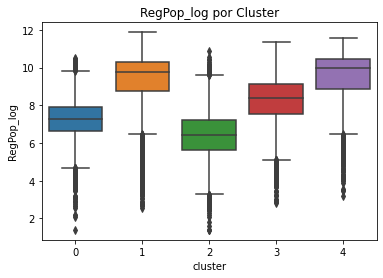

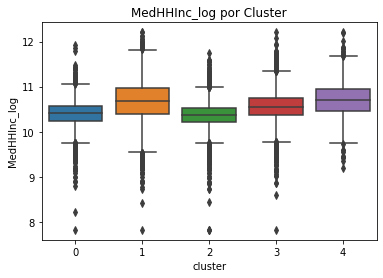

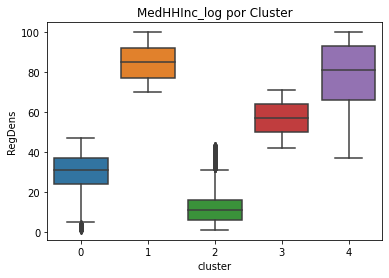

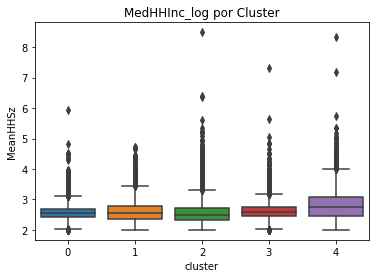

In [ ]:
sns.boxplot(x='cluster', y='RegPop_log', data=df_kmeans)
plt.title("RegPop_log por Cluster")
plt.show()

sns.boxplot(x='cluster', y='MedHHInc_log', data=df_kmeans)
plt.title("MedHHInc_log por Cluster")
plt.show()

sns.boxplot(x='cluster', y='RegDens', data=df_kmeans)
plt.title("MedHHInc_log por Cluster")
plt.show()

sns.boxplot(x='cluster', y='MeanHHSz', data=df_kmeans)
plt.title("MedHHInc_log por Cluster")
plt.show()

# Conclusiones y recomendaciones

* ¿Cuantos clusters has identificado?

He identificado 5 clusters
* ¿Qué les caracteriza a cada uno de ellos?
* ¿Qué propuesta de tipología de tiendas propondrías?
* ¿Que otros factores tendrías en cuenta para diseñar un plan de expansión de tiendas?